# Final Exam

__SEUNGKI LEE__  
__35460312__  

## BS1: Number of links and list of links [8pts]

In [2]:
from bs4 import BeautifulSoup as bs
import requests as req

In [3]:
url = "https://www.w3schools.com/js/js_intro.asp"
res = req.get(url)
soup = bs(res.content, "html.parser")
list_link = []

In [12]:
for a in soup.findAll("a", href=True):
    if a.text:
        list_link.append(a["href"])
print("Number Links = " + str(len(list_link)))

Number Links = 999


In [174]:
print("From 0 ~ 9\n")
for i in range(10):
    print(list_link[i])
print("\n...\n")
print("From 990 ~ 999\n")
for i in range(990, 999):
    print(list_link[i])

From 0 ~ 9

//www.w3schools.com
/html/default.asp
/css/default.asp
/js/default.asp
/sql/default.asp
/php/default.asp
/bootstrap/default.asp
/howto/default.asp
/jquery/default.asp
/w3css/default.asp

...

From 990 ~ 999

/cert/default.asp
/cert/default.asp
/cert/default.asp
/cert/default.asp
/about/about_copyright.asp
/about/about_privacy.asp
/about/about_copyright.asp
//www.w3schools.com/w3css/
//www.w3schools.com


## Panda1: Modified headings [4pts]

In [4]:
import pandas as pd

In [5]:
csv_url = "https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv"
df = pd.read_csv(csv_url)
df.head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [6]:
df.rename(columns={"PClass": "PassengerClass", "Sex": "Gender"}, inplace=True)
df.head(2)

,Name,PassengerClass,Age,Gender,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


## Panda2: Average age passengers [5pts]

In [7]:
AverageAgeAll = df["Age"].mean()
AverageAgeAll

30.397989417989415

## Panda3: Average age men vs women [5pts]

In [8]:
AverageAgeMen = df.loc[df["Gender"] == "male"]["Age"].mean()
AverageAgeWomen =df.loc[df["Gender"] == "female"]["Age"].mean()
print("Average Age All Men = {}\nAverage Age All Women = {}".format(AverageAgeMen, AverageAgeWomen))

Average Age All Men = 31.014337606837604
Average Age All Women = 29.39642361111111


## KMeans1: graph1 [6pts]

In [47]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [64]:
def generate_data(num_points, x_range, y_range):
    x = [random.randint(x_range[0], x_range[1]) for i in range(num_points)]
    y = [random.randint(y_range[0], y_range[1]) for i in range(num_points)]
    return x, y

In [75]:
ltx, lty = generate_data(50, [0,400], [600,1000])
rtx, rty = generate_data(50, [600,1000], [600, 1000])
lbx, lby = generate_data(50, [0, 400], [0, 400])
rbx, rby = generate_data(50, [600, 1000], [0, 400])

X = [ltx, rtx, lbx, rbx]
y = [lty, rty, lby, rby]

<function matplotlib.pyplot.show>

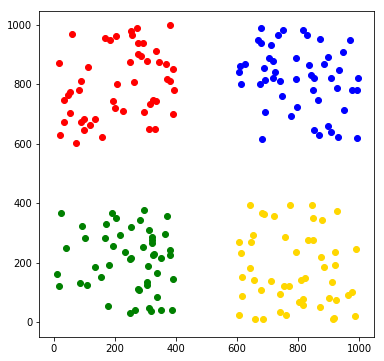

In [169]:
fig = plt.figure(figsize=(6,6))
plt.scatter(ltx, lty, c="red")
plt.scatter(rtx, rty, c="blue")
plt.scatter(lbx, lby, c="green")
plt.scatter(rbx, rby, c="gold")
plt.show

## KMeans2: graph2 [6pts]

In [74]:
def merge_data(x, y):
    return list(zip(x, y))

In [88]:
dfX = ltx + rtx + lbx + rbx
dfy = lty + rty + lby + rby

In [80]:
lt = merge_data(ltx, lty)
rt = merge_data(rtx, rty)
lb = merge_data(lbx, lby)
rb = merge_data(rbx, rby)
whole = [lt, rt, lb, rb]

In [130]:
kdf = pd.DataFrame({"x": dfX, "y": dfy})
kdf.head()

,x,y
0,382,997
1,325,745
2,85,781
3,296,706
4,278,938


In [110]:
matrix = kdf.values

In [111]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(matrix)

In [112]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [165]:
cent = kmeans.cluster_centers_
cx = []
cy = []
sc = [75, 75, 75, 75]

In [166]:
for i in range(4):
    cx.append(cent[i][0])
    cy.append(cent[i][1])

<function matplotlib.pyplot.show>

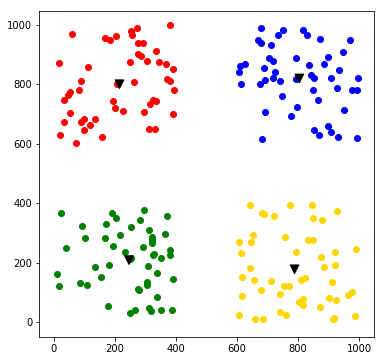

In [170]:
fig = plt.figure(figsize=(6,6))
plt.scatter(ltx, lty, c="red")
plt.scatter(rtx, rty, c="blue")
plt.scatter(lbx, lby, c="green")
plt.scatter(rbx, rby, c="gold")
plt.scatter(cx, cy, c="black", marker="v",s=sc)
plt.show

## Thank You for a Wonderful Semester!